In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D


Using TensorFlow backend.


In [3]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
from keras import backend as k

if k.image_data_format()=='channels_first':
  train_images = mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
  test_images = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
  input_shape = (1,28,28)
else:
   train_images = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
   test_images = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
   input_shape = (28,28,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /=255
test_images /=255

In [0]:
train_labels = keras.utils.to_categorical(mnist_train_labels ,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


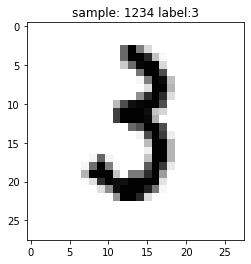

In [7]:
import matplotlib.pyplot as plt

def display_sample(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis = 0)
  image = train_images[num].reshape([28,28])
  plt.title('sample: %d label:%d'%(num,label))
  plt.imshow(image,cmap = plt.get_cmap('gray_r'))
  plt.show()

display_sample(1234)


In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
history = model.fit(train_images,train_labels,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 2,
                    validation_data = (test_images,test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 25s - loss: 0.1917 - acc: 0.9418 - val_loss: 0.0496 - val_acc: 0.9849
Epoch 2/10
 - 12s - loss: 0.0814 - acc: 0.9754 - val_loss: 0.0374 - val_acc: 0.9878
Epoch 3/10
 - 12s - loss: 0.0629 - acc: 0.9804 - val_loss: 0.0341 - val_acc: 0.9900
Epoch 4/10
 - 12s - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 5/10
 - 12s - loss: 0.0432 - acc: 0.9861 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 6/10
 - 11s - loss: 0.0382 - acc: 0.9879 - val_loss: 0.0287 - val_acc: 0.9914
Epoch 7/10
 - 11s - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0384 - val_acc: 0.9891
Epoch 8/10
 - 11s - loss: 0.0300 - acc: 0.9902 - val_loss: 0.0327 - val_acc: 0.9910
Epoch 9/10
 - 12s - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0282 - val_acc: 0.9921
Epoch 10/10
 - 12s - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0311 - val_acc: 0.9922


In [12]:
score = model.evaluate(test_images,test_labels,verbose = 0)
print('test loss:',score[0])
print('test_accuracy:',score[1])

test loss: 0.031096738024436764
test_accuracy: 0.9922
